# Distance analysis for gait data
Richard Sowers r-sowers@illinois.edu https://publish.illinois.edu/r-sowers/ Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [44]:
%run Distance_difference_analysis_for_all_data.ipynb

In [45]:
from scipy import stats

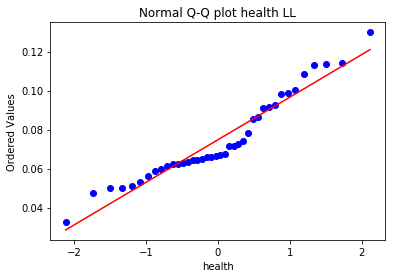

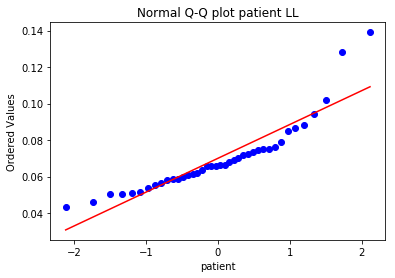

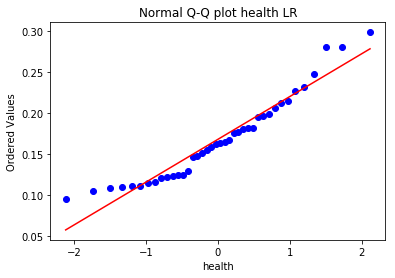

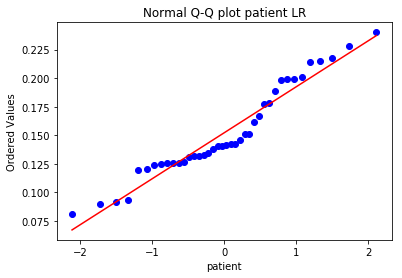

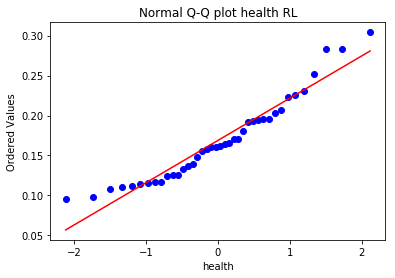

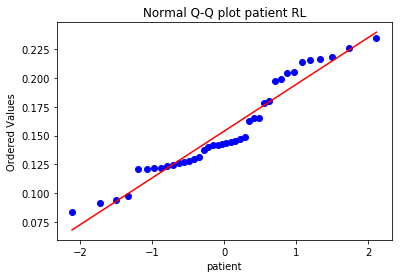

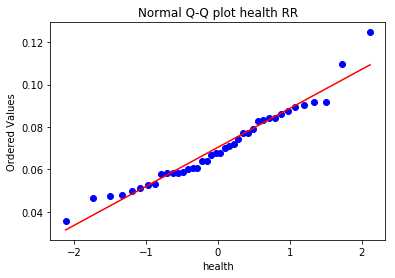

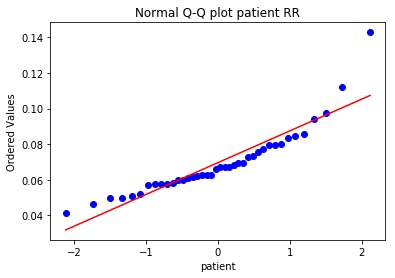

In [46]:
# check QQ plot before Shapiro-Wilk test
stats.probplot(health_LL_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot health LL")
plt.xlabel("health")
plt.show()

stats.probplot(patient_LL_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot patient LL")
plt.xlabel("patient")
plt.show()

stats.probplot(health_LR_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot health LR")
plt.xlabel("health")
plt.show()

stats.probplot(patient_LR_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot patient LR")
plt.xlabel("patient")
plt.show()

stats.probplot(health_RL_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot health RL")
plt.xlabel("health")
plt.show()

stats.probplot(patient_RL_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot patient RL")
plt.xlabel("patient")
plt.show()

stats.probplot(health_RR_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot health RR")
plt.xlabel("health")
plt.show()

stats.probplot(patient_RR_mean, dist="norm", plot=plt)
plt.title("Normal Q-Q plot patient RR")
plt.xlabel("patient")
plt.show()


In [58]:
# performing Shapiro-Wilk test with 1% significance level.
h1 = stats.shapiro(health_LL_mean)
print(h1)
p1 = stats.shapiro(patient_LL_mean)
print(p1)
h2 = stats.shapiro(health_LR_mean)
print(h2)
p2 = stats.shapiro(patient_LR_mean)
print(p2)
h3 = stats.shapiro(health_RL_mean)
print(h3)
p3 = stats.shapiro(patient_RL_mean)
print(p3)
h4 = stats.shapiro(health_RR_mean)
print(h4)
p4 = stats.shapiro(patient_RR_mean)
print(p4)

print("According to Shapiro-Wilk test, using alpha = 0.01, we can conclude patient_RR_mean and patient_LL_mean is not normally distributed")

(0.9367426037788391, 0.026888323947787285)
(0.8459278345108032, 7.176116923801601e-05)
(0.9304409027099609, 0.016648773103952408)
(0.9397420287132263, 0.03389482572674751)
(0.9321334362030029, 0.01891748048365116)
(0.9333323240280151, 0.02071848139166832)
(0.9611026048660278, 0.18266017735004425)
(0.8648027777671814, 0.00021015069796703756)
According to Shapiro-Wilk test, using alpha = 0.01, we can conclude patient_RR_mean and patient_LL_mean is not normally distributed


In [61]:
# performing Levene’s test on LR and RL pattern
l1 = stats.levene(health_LR_mean, patient_LR_mean)
print(l1)
l2 = stats.levene(health_RL_mean, patient_RL_mean)
print(l2)

LeveneResult(statistic=2.4378933437335744, pvalue=0.12248360156359502)
LeveneResult(statistic=1.8964438830837023, pvalue=0.17241628418393928)


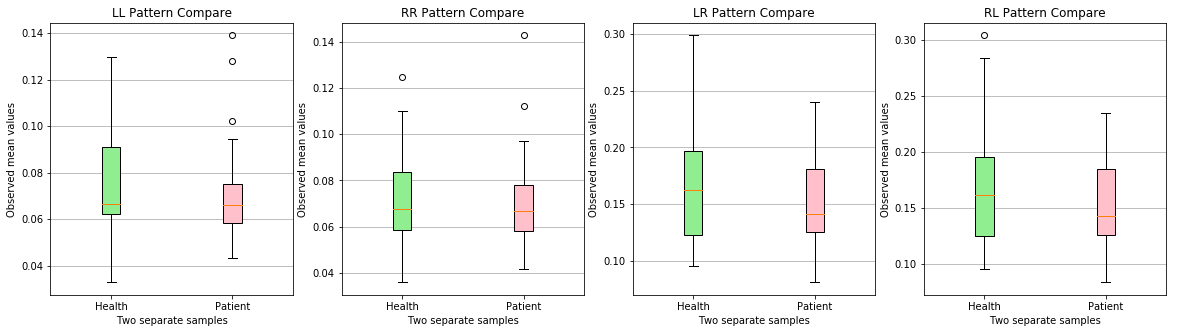

In [12]:
data1 = [health_LL_mean, patient_LL_mean]
data2 = [health_RR_mean, patient_RR_mean]
data3 = [health_LR_mean, patient_LR_mean]
data4 = [health_RL_mean, patient_RL_mean]
labels = ['Health', 'Patient']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# rectangular box plot
bplot1 = axes[0].boxplot(data1, vert=True, patch_artist=True, labels=labels)  # will be used to label x-ticks
axes[0].set_title('LL Pattern Compare')

# rectangular box plot
bplot2 = axes[1].boxplot(data2, vert=True,  patch_artist=True,  labels=labels)  # will be used to label x-ticks
axes[1].set_title('RR Pattern Compare')

# rectangular box plot
bplot3 = axes[2].boxplot(data3, vert=True,  patch_artist=True,  labels=labels)  # will be used to label x-ticks
axes[2].set_title('LR Pattern Compare')

# rectangular box plot
bplot4 = axes[3].boxplot(data4, vert=True,  patch_artist=True,  labels=labels)  # will be used to label x-ticks
axes[3].set_title('RL Pattern Compare')

# rectangular box plot
colors = ['lightgreen', 'pink']
for bplot in (bplot1, bplot2, bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Two separate samples')
    ax.set_ylabel('Observed mean values')

plt.show()

In [62]:

print(stats.ttest_ind(health_LL_mean, patient_LL_mean, equal_var = False))
print(stats.ttest_ind(health_LR_mean, patient_LR_mean, equal_var = False))
print(stats.ttest_ind(health_RR_mean, patient_RR_mean, equal_var = False))
print(stats.ttest_ind(health_RL_mean, patient_RL_mean, equal_var = False))
print("LR pattern shows the smallest p value")

Ttest_indResult(statistic=1.0337010540534481, pvalue=0.3045066527051377)
Ttest_indResult(statistic=1.5140307229233463, pvalue=0.13433266096416924)
Ttest_indResult(statistic=0.18992103137408622, pvalue=0.8498648188717016)
Ttest_indResult(statistic=1.4058088224971055, pvalue=0.16401905233682604)
LR pattern shows the smallest p value


In [69]:
#F test for LR and RL std array, use alpha  = 0.1
F =np.var(health_LR_std) / np.var(patient_LR_std)
df1 = len(health_LR_std)-1
df2 = len(patient_LR_std)-1
p_value = stats.f.cdf(F, df1, df2)
print(F , p_value)

F =np.var(health_RL_std) / np.var(patient_RL_std)
df1 = len(health_RL_std)-1
df2 = len(patient_RL_std)-1
p_value = stats.f.cdf(F, df1, df2)
print(F , p_value)

print("According to the F test, In LR pattern, patient's variance is likely to be eqaul to health's variance.")
print("According to the F test, In RL pattern, patient's variance is not eqaul to health's variance.")

0.7873628048681685 0.22939527501207782
0.4655693071907492 0.009536668116617958
According to the F test, In LR pattern, patient's variance is likely to be eqaul to health's variance.
According to the F test, In RL pattern, patient's variance is not eqaul to health's variance.


The distance mean for all patient in LL pattern is 0.06998278470023764
The distance mean for all health people in LL pattern is 0.0747880798800868
The difference in patient mean and health mean for LL pattern is -0.004805295179849164


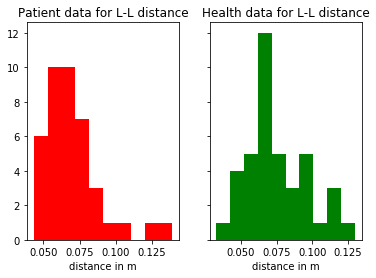

In [4]:
# visualization of patient and health compare
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(patient_LL_mean,color = 'r')
ax1.set_title('Patient data for L-L distance')
ax1.set_xlabel('distance in m')
ax2.hist(health_LL_mean,color = 'g')
ax2.set_title('Health data for L-L distance')
ax2.set_xlabel('distance in m')
print("The distance mean for all patient in LL pattern is " + str(patient_LL_mean.mean()))
print("The distance mean for all health people in LL pattern is " + str(health_LL_mean.mean()))
print("The difference in patient mean and health mean for LL pattern is " + str(patient_LL_mean.mean() - health_LL_mean.mean()))

The distance mean for all patient in RR pattern is 0.06962777998315675
The distance mean for all health people in RR pattern is 0.07041360531386916
0.018003235275293145
The difference in patient mean and health mean for RR pattern is -0.0007858253307124058


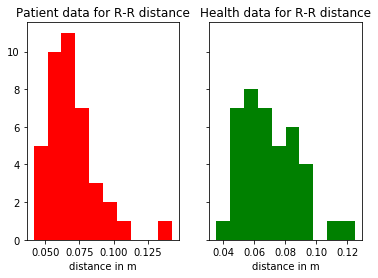

In [5]:
# visualization of patient and health compare
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(patient_RR_mean,color = 'r')
ax1.set_title('Patient data for R-R distance')
ax1.set_xlabel('distance in m')
ax2.hist(health_RR_mean,color = 'g')
ax2.set_title('Health data for R-R distance')
ax2.set_xlabel('distance in m')
print("The distance mean for all patient in RR pattern is " + str(patient_RR_mean.mean()))
print("The distance mean for all health people in RR pattern is " + str(health_RR_mean.mean()))
print(health_RR_mean.std())
print("The difference in patient mean and health mean for RR pattern is " + str(patient_RR_mean.mean() - health_RR_mean.mean()))

The distance mean for all patient in LR pattern is 0.15221255786715088
The distance mean for all health people in LR pattern is 0.16797922060120968
0.051622000280809065
The difference in patient mean and health mean for LR pattern is -0.0157666627340588


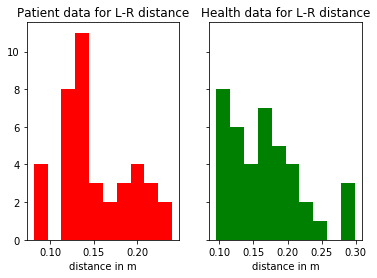

In [6]:
# visualization of patient and health compare
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(patient_LR_mean,color = 'r')
ax1.set_title('Patient data for L-R distance')
ax1.set_xlabel('distance in m')
ax2.hist(health_LR_mean,color = 'g')
ax2.set_title('Health data for L-R distance')
ax2.set_xlabel('distance in m')
print("The distance mean for all patient in LR pattern is " + str(patient_LR_mean.mean()))
print("The distance mean for all health people in LR pattern is " + str(health_LR_mean.mean()))
print(health_LR_mean.std())
print("The difference in patient mean and health mean for LR pattern is " + str(patient_LR_mean.mean() - health_LR_mean.mean()))

The distance mean for all patient in RL pattern is 0.15392300881184315
The distance mean for all health people in RL pattern is 0.1687617117650539
0.052316347898249176
The difference in patient mean and health mean for RL pattern is -0.014838702953210742


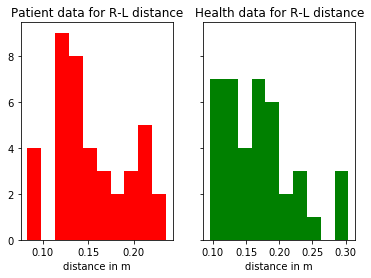

In [7]:
# visualization of patient and health compare
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(patient_RL_mean,color = 'r')
ax1.set_title('Patient data for R-L distance')
ax1.set_xlabel('distance in m')
ax2.hist(health_RL_mean,color = 'g')
ax2.set_title('Health data for R-L distance')
ax2.set_xlabel('distance in m')
print("The distance mean for all patient in RL pattern is " + str(patient_RL_mean.mean()))
print("The distance mean for all health people in RL pattern is " + str(health_RL_mean.mean()))
print(health_RL_mean.std())
print("The difference in patient mean and health mean for RL pattern is " + str(patient_RL_mean.mean() - health_RL_mean.mean()))

In [8]:
Biggest_difference = max(abs(patient_LL_mean.mean() - health_LL_mean.mean()), 
                         abs(patient_RR_mean.mean() - health_RR_mean.mean()),
                         abs(patient_RL_mean.mean() - health_RL_mean.mean()),
                         abs(patient_LR_mean.mean() - health_LR_mean.mean()))
print(Biggest_difference)

0.0157666627340588


In [9]:
print("The biggest difference between patience and health people appears in LR pattern")

The biggest difference between patience and health people appears in LR pattern
